## Prior Predictive Distribution

$$ P(X) = \int_0^1 P(X|\theta)P(\theta)d\theta \\ = \frac{\Gamma(N+1) \Gamma(a+b) \Gamma(a+X)\Gamma(N+b-X)}{\Gamma(X+1)\Gamma(N-X+1)\Gamma(a)\Gamma(b)\Gamma(a+b+N)}$$

$$ Prior P(\theta) = Beta(a,b)\\ Likelihood P(x|\theta) = Binomial(N,x) $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def prior_predictive_distribution(a,b,N,x):
    '''
    prior is Beta distribution, Likelihood is Binomial. those two are conjugate.
    '''
    nominator = math.gamma(N+1)*math.gamma(a+b)*math.gamma(a+x)*math.gamma(N+b-x)
    denominator = math.gamma(x+1)*math.gamma(N-x+1)*math.gamma(a)*math.gamma(b)*math.gamma(a+b+N)
    return nominator/denominator
   

In [3]:
a = 2
b = 2
N = 10
res = 0

for x in range(N+1):
    res += prior_predictive_distribution(a,b,N,x)

res

0.9999999999999999

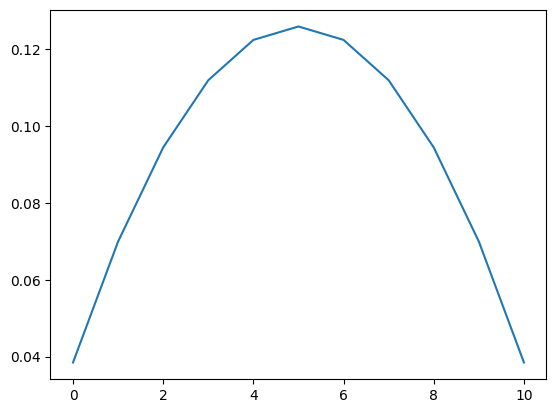

In [4]:
points = np.array([[k, prior_predictive_distribution(a,b,N,k)] for k in range(N+1)])
plt.plot(points[:,0],points[:,1])


## Posterior Predictive Distribution

$$ P(X^{\prime}|X) = \int_0^1 P(X^{\prime} | \theta,\sout{X}) P(\theta|X) d\theta
\\ = \frac{\Gamma(N+1) \Gamma(a+b) \Gamma(a+X)\Gamma(N+b-X)}{\Gamma(X+1)\Gamma(N-X+1)\Gamma(a)\Gamma(b)\Gamma(a+b+N)}$$

In [5]:
from core.BetaBinomial import BetaBinomialDistribution
from core.Beta import BetaDistribution
from core.Binomial import BinomialDistribution

### Example.

#### Coin Flip
동전 던지기를 했을때, 앞이 나올 확률 $\theta$, 뒷면이 나올 확률을 $1-\theta$ 라고 하자.
- $P(\theta)$: $\theta$ 의 확률 분포 (Prior) 즉, $P(\theta = 0.5 )$: 동전이 앞이 나올 확률이 0.5가 될 확률 

In [6]:
# Example Coinf

# Prior P(theta) Beta(a,b) = theta^a-1 * (1-theta)^b-1 / B(a,b)
a = 5 
b = 5

# Sampled Data X
N = 30 # 10개를 뽑았고,
x = 7 # 그 중 앞면이 7개
# Likelihood P(X|theta) = Binomial(X=x;N,k)

# New Sample Data X' (Posterior Predictive)
N_prime = 10


#### Prior $P(\theta)$

     4        4
630⋅θ ⋅(1 - θ) 


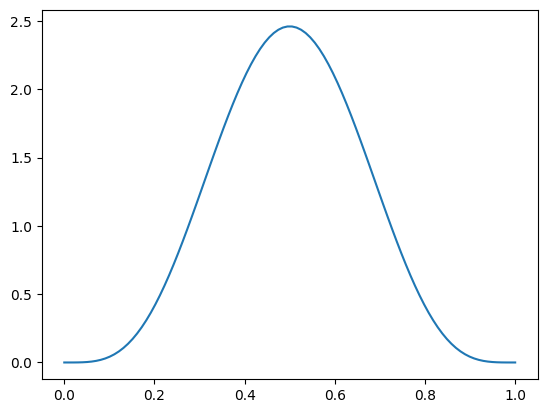

In [7]:
beta = BetaDistribution()
beta.plot(0,1,'theta',a=a,b=b)

#### Likelihood $P(X|\theta)$

     7        3
120⋅θ ⋅(1 - θ) 


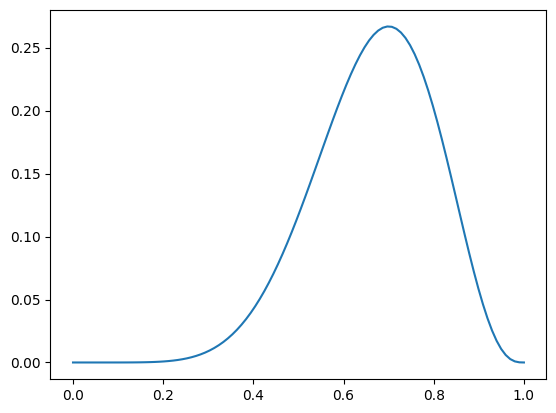

     7        3
120⋅θ ⋅(1 - θ) 
1                   
⌠                   
⎮      7        3   
⎮ 120⋅θ ⋅(1 - θ)  dθ
⌡                   
0                   

=  0.0909090909090909


In [8]:
binomial = BinomialDistribution()
binomial.plot(0,1,'theta', N=N, k=x)
binomial.integrate(('theta',0,1),N=N,k=x)

#### Prior Predictive Distribution $P(X)$

  Γ(N + 1)⋅Γ(a + b)⋅Γ(a + x)⋅Γ(N + b - x)   
────────────────────────────────────────────
Γ(a)⋅Γ(b)⋅Γ(x + 1)⋅Γ(N + a + b)⋅Γ(N - x + 1)
     Γ(15 - x)⋅Γ(x + 5)    
───────────────────────────
53209728⋅Γ(11 - x)⋅Γ(x + 1)


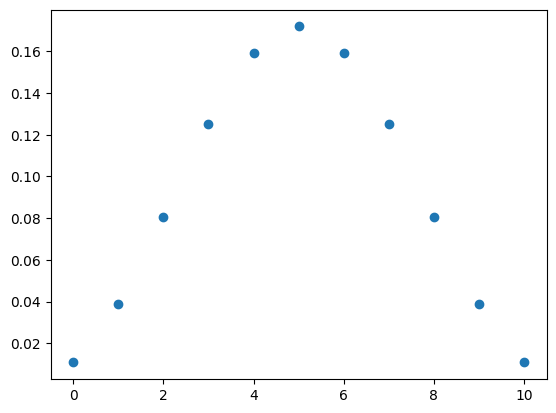

In [12]:
betaBin = BetaBinomialDistribution()
print(betaBin)
betaBin.scatter(0,10,'x', N=N, a=a,b=b)

#### Posterior Predictive Distribution $P(X'|X)$

           Γ(28 - x)⋅Γ(x + 12)            
──────────────────────────────────────────
13866028650437483520000⋅Γ(21 - x)⋅Γ(x + 1)


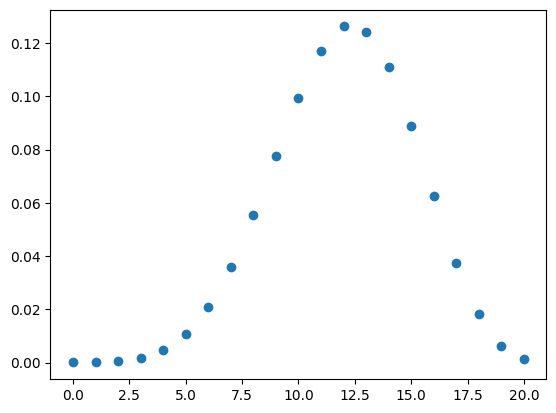

In [13]:
N_prime = 20 # X' 에서 샘플 뽑는 횟수
betaBin.scatter(0,20,'x',N=N_prime,a = x + a, b = N + b - x)